In [539]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 500)
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['SimHei']

In [525]:
import pandas as pd
#读入字段解释数据并处理成以指标为index的DataFrame
#dd=pd.read_excel('illustration.XLSX',skiprows=[0]).fillna(method='ffill').drop([0])
dd=pd.read_excel('illustration.XLSX').fillna(method='ffill').drop([0])
dicts=pd.DataFrame(dd.reset_index(drop=True).values,columns=['illus2','vars','illus1','logical_illus'])
dicts.set_index('vars',drop=True)
dicts=dicts[['vars','illus1','illus2','logical_illus']].set_index('vars',drop=True)
# dicts.reset_index(inplace=True)


In [526]:
dat1=pd.read_csv('train_data.csv')
col_0=dat1.columns.to_list()
col_1=[dicts.loc[x].illus1 for x in col_0]
dat=pd.DataFrame(dat1.values,columns=col_1)

In [527]:
dat.drop(columns=['user_id'],inplace=True)

In [528]:
dat.shape

(7761, 200)

In [493]:
# Traditional Credit Scoring Using Logistic Regression
import scorecardpy as sc
import pandas as pd
# # data prepare ------
# # load germancredit data
# dat =pd.read_csv('train_data.csv')
# #dt_s=dat.copy()
# filter variable via missing rate, iv, identical value rate
dt_s = sc.var_filter(dat, y="是否逾期")
#xcol=dat.columns.to_list()[3:20]
#dt_s = sc.var_filter(dat, y="y",x=xcol)              #--------------return a DataFrame only filters out from [x]
# dt_s = sc.var_filter(dat, y="y")
#dt_s = sc.var_filter(dat, y="是否逾期",return_rm_reason=True) #-------------return a dict(2 DataFrame) with keys:['dt','rm']

[INFO] filtering variables ...


ValueError: Shape of passed values is (2, 2), indices imply (7761, 2)

In [529]:
# dt_s1=dt_s['dt']
# dt_s2=dt_s['rm']
dt_s1=dat.copy()

In [530]:
##去除多重共线性
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(x, thres=10.0):
    X_m = np.matrix(x)
    VIF_list = [variance_inflation_factor(X_m, i) for i in range(X_m.shape[1])]
    maxvif=pd.DataFrame(VIF_list,index=x.columns,columns=["vif"])
    col_save=list(maxvif[maxvif.vif<=float(thres)].index)
    col_delete=list(maxvif[maxvif.vif>float(thres)].index)
    print(maxvif)
    print('delete Variables:', col_delete)
    return x[col_save]

In [532]:
ddx=pd.DataFrame()
for x in dt_s1.columns:
    #ddx[x]=dt_s1[x].fillna(dt_s1[x].median())
    ddx[x]=dat[x].fillna(0)
ddy=vif(ddx,thres=10.)

                                     vif
是否逾期                        1.517883e+00
性别                          1.242273e+00
年龄                          9.864921e+00
是否有房                        1.623246e+00
是否有车                        1.881710e+00
是否有孩                        1.126242e+00
高消费标志                       1.631162e+00
珠宝消费标志                      1.102919e+00
婚庆消费标志                      1.078510e+00
保险标志                        2.750100e+01
寿险标志                        1.453623e+01
人身险标志                       2.150258e+00
健康险标志                                NaN
有财产险标志                      1.134504e+01
投资理财类标志                     1.796632e+01
基金标志                        1.095637e+00
信托类标志                       2.110778e+00
资产管理类标志                     1.082643e+00
银行理财类标志                     1.437937e+01
有无母婴/教育消费                   1.057799e+00
借记卡数量                       2.627143e+04
贷记卡数量                       2.204085e+04
借记卡（钻石）持卡数量                 1.408317e+00
借记卡（白金）持卡数量     

In [533]:
ddy.shape

(7761, 81)

In [229]:
# fiv=sc.iv(ddy, 'y', order=True)

In [165]:
# fiv.merge(dicts.reset_index(),how='inner',right_on='vars',left_on='variable')

[INFO] creating woe binning ...
Binning on 7761 rows and 81 columns in 00:00:51


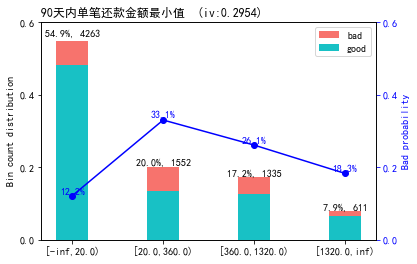

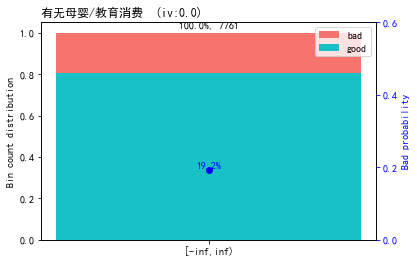

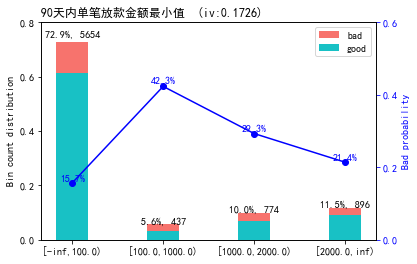

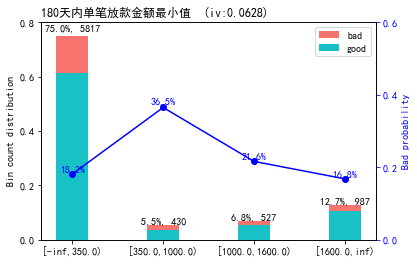

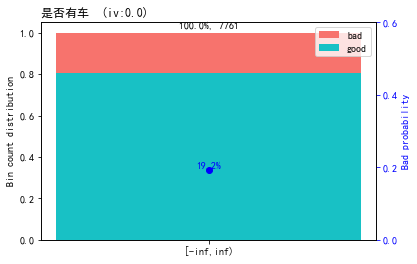

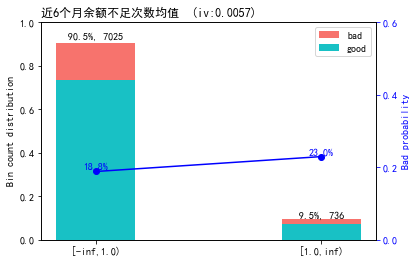

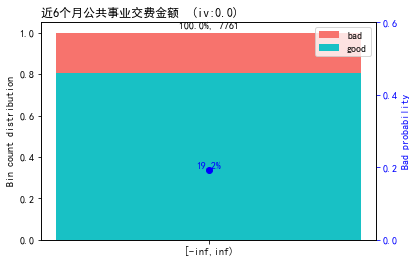

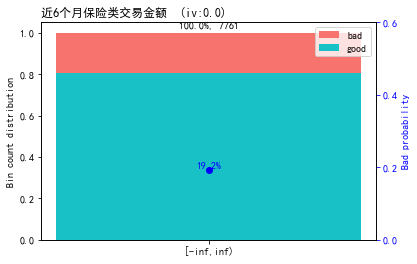

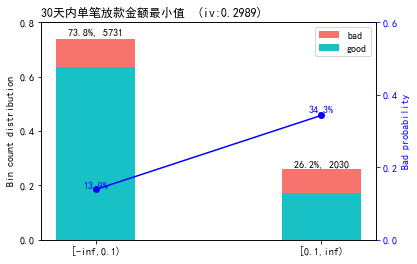

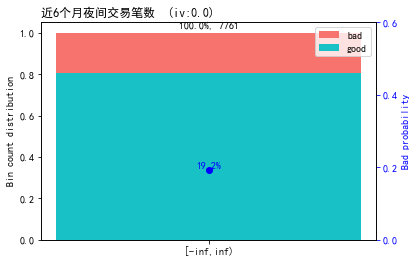

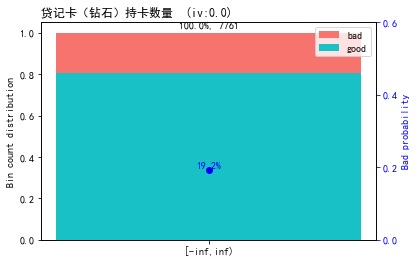

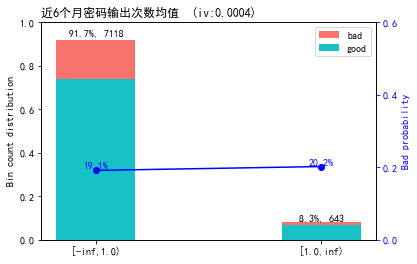

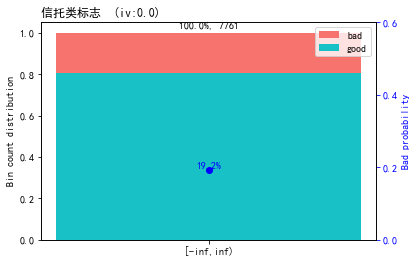

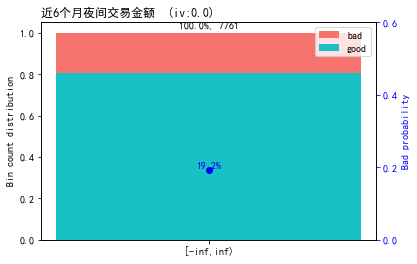

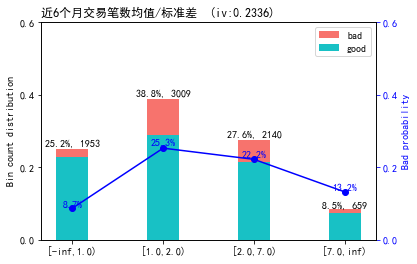

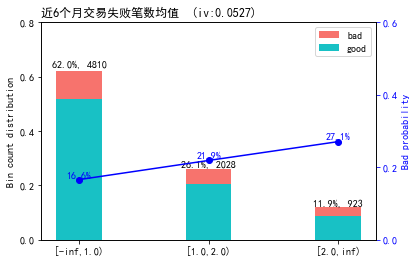

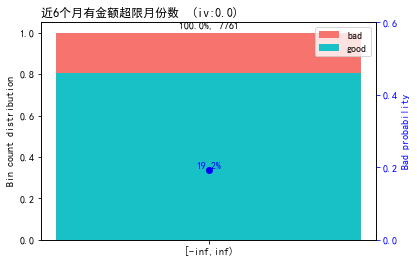

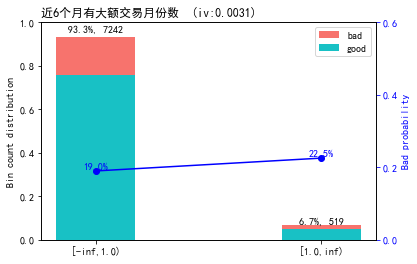

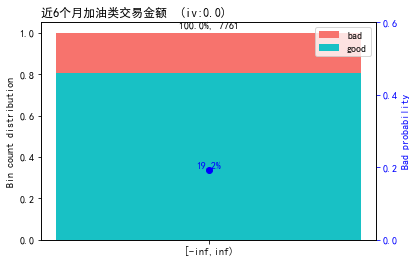

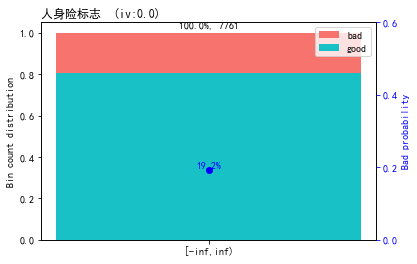

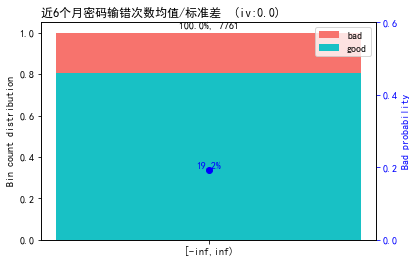

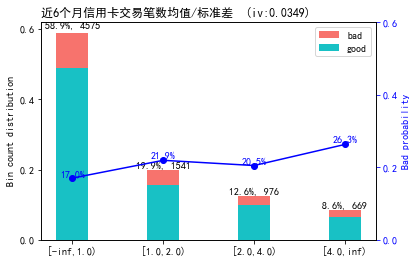

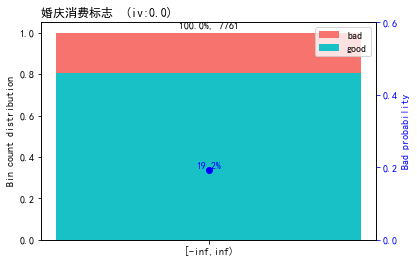

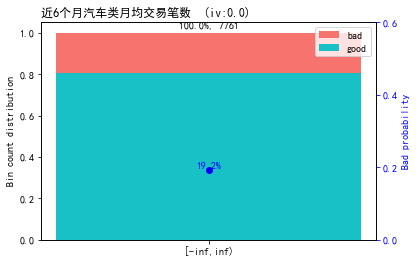

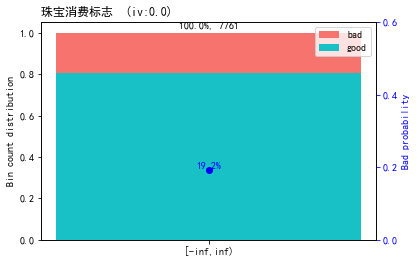

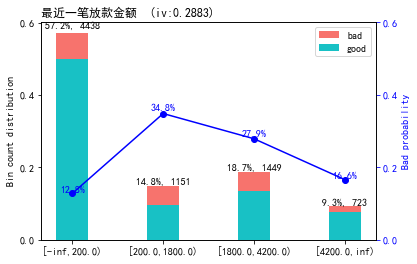

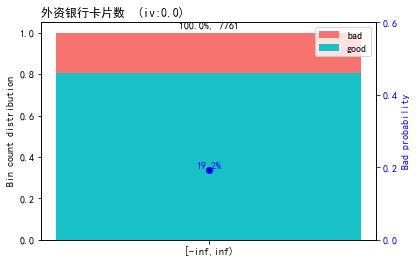

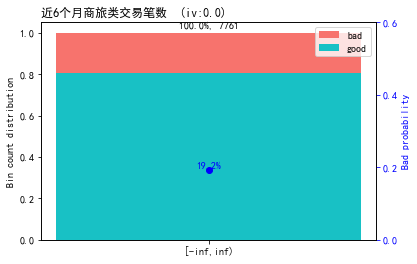

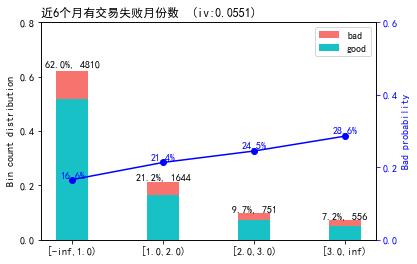

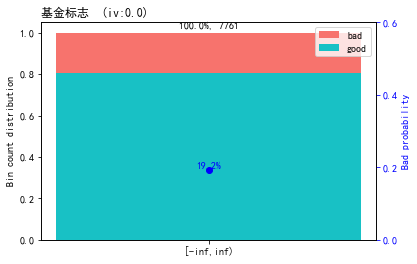

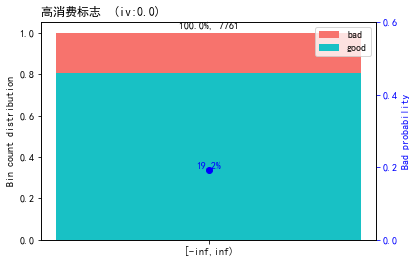

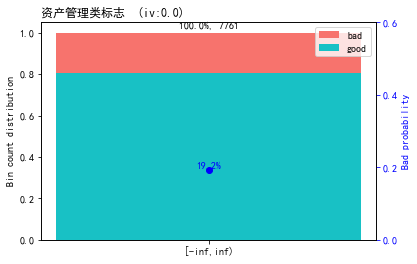

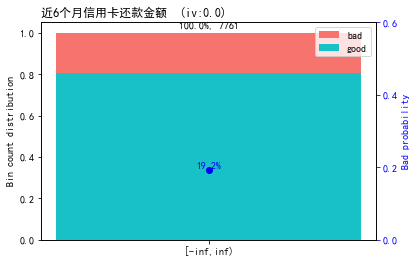

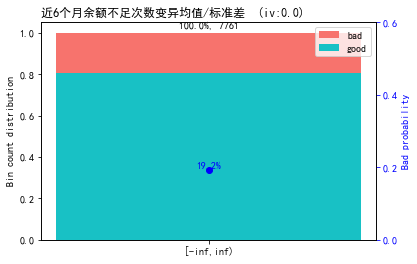

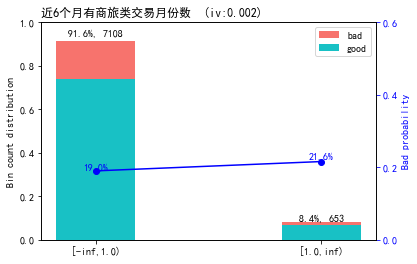

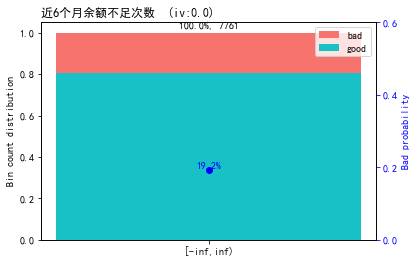

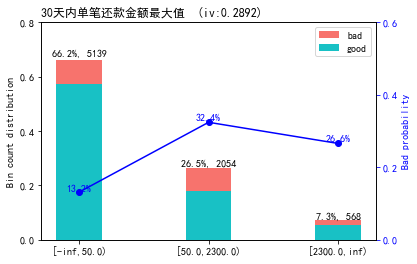

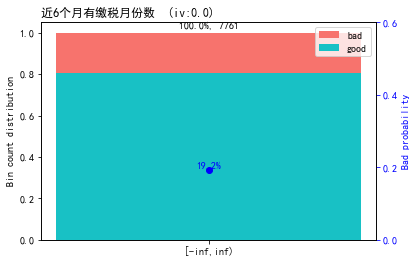

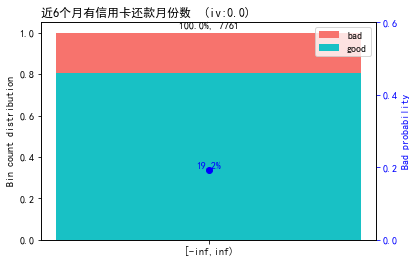

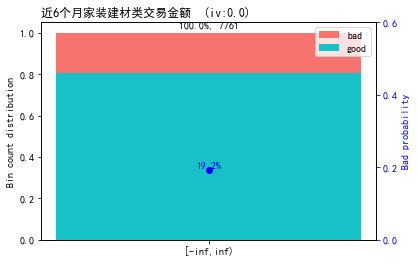

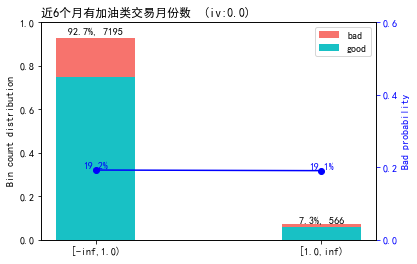

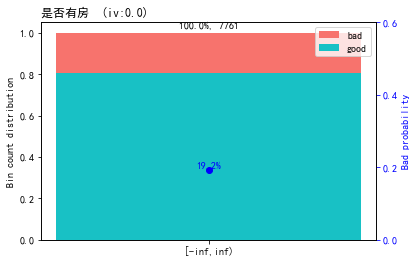

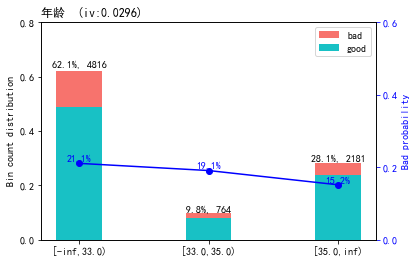

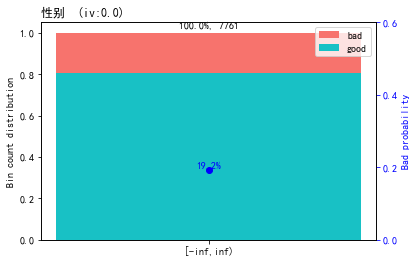

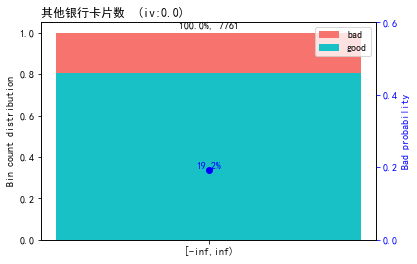

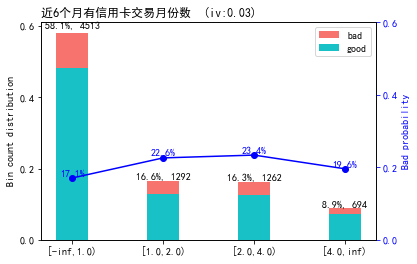

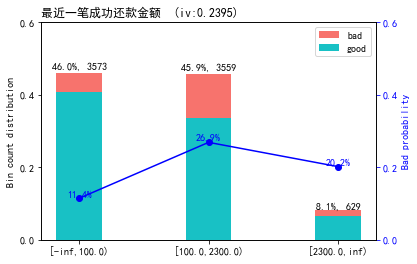

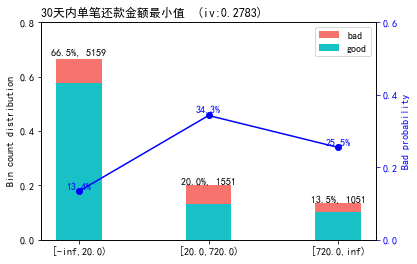

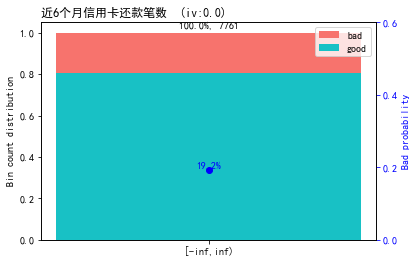

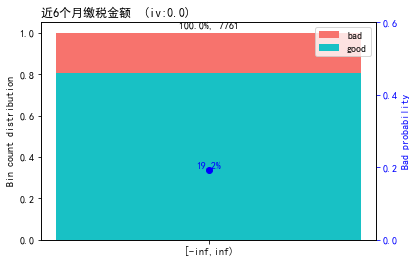

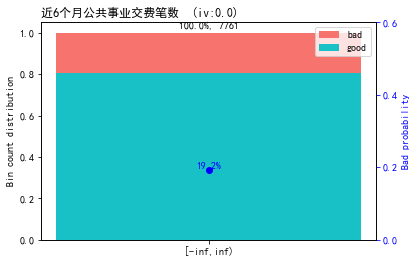

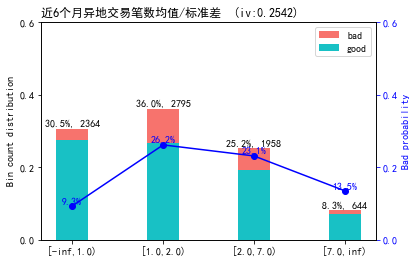

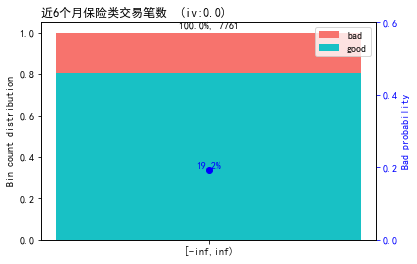

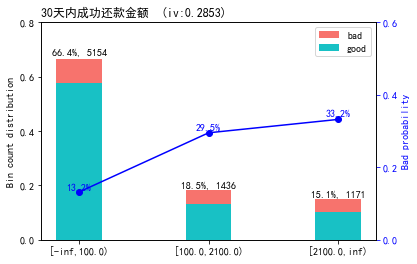

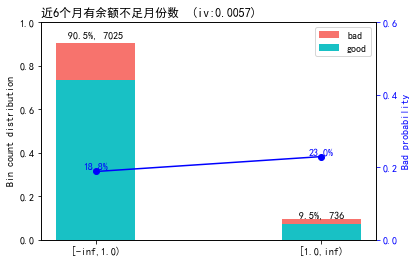

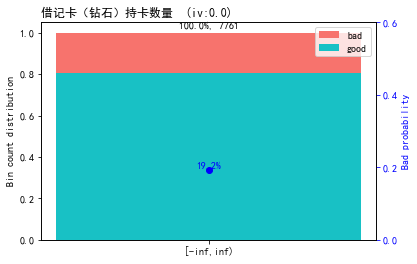

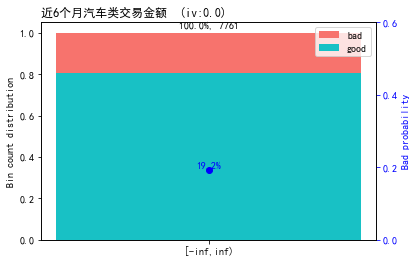

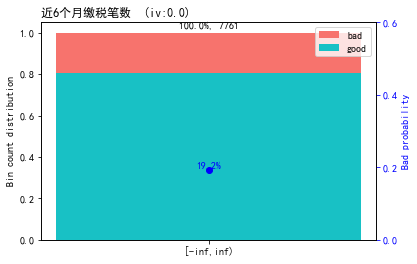

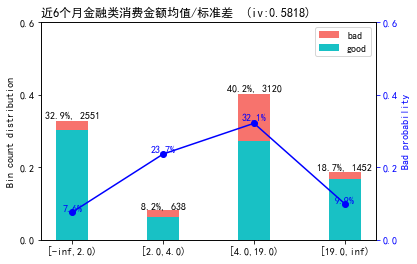

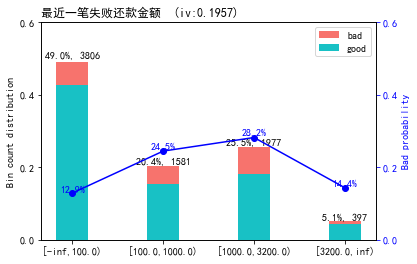

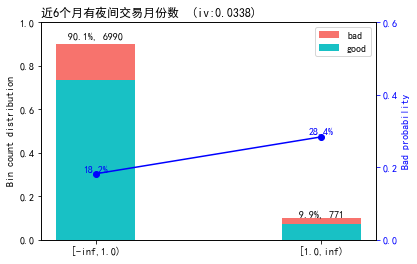

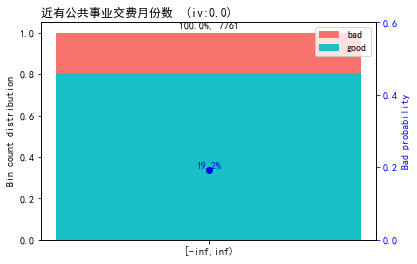

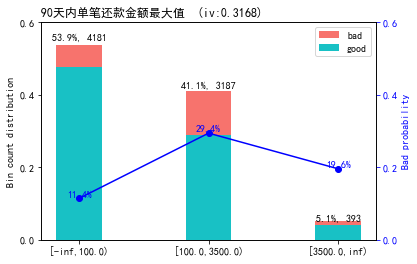

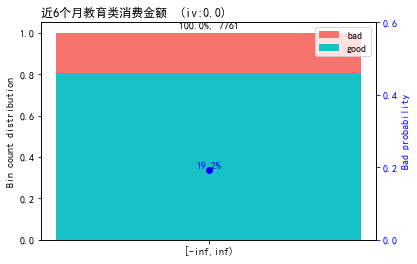

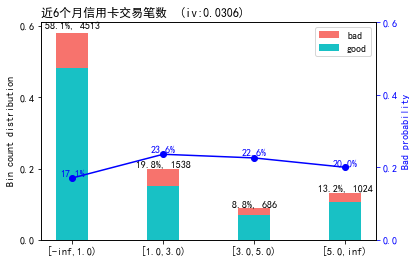

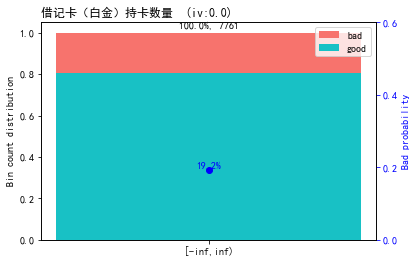

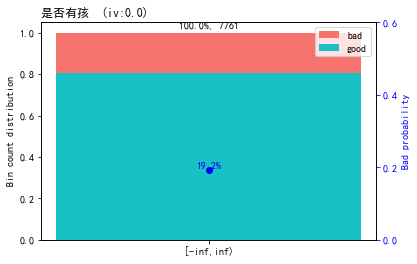

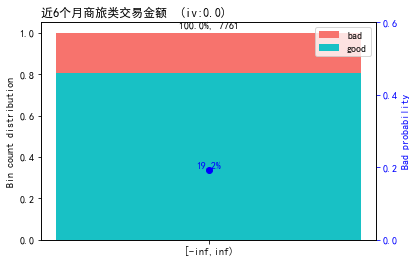

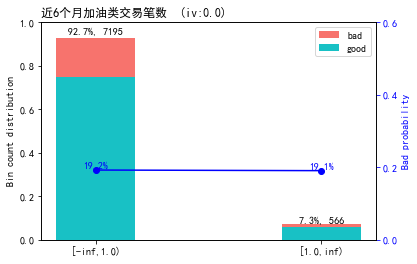

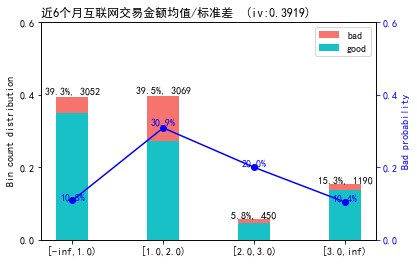

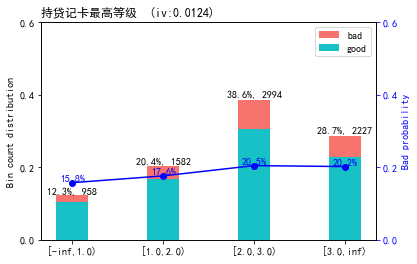

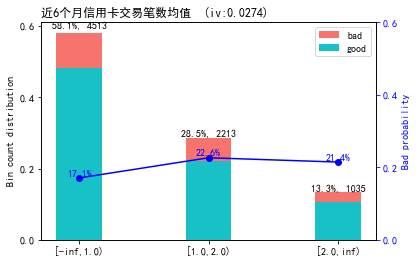

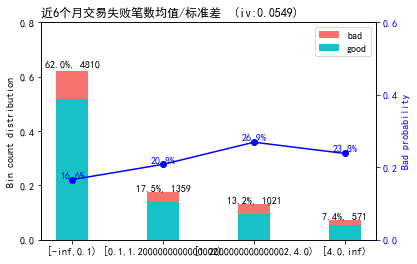

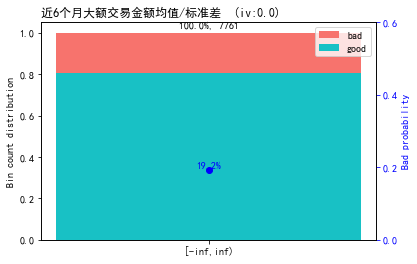

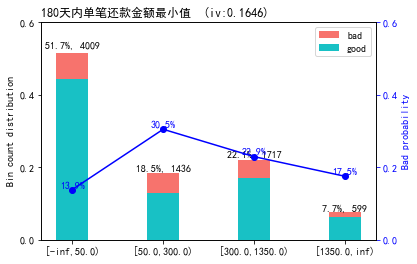

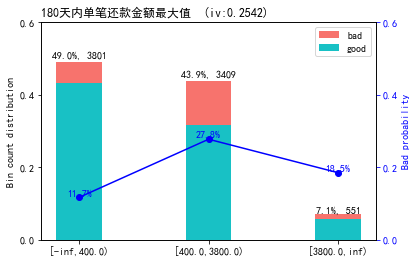

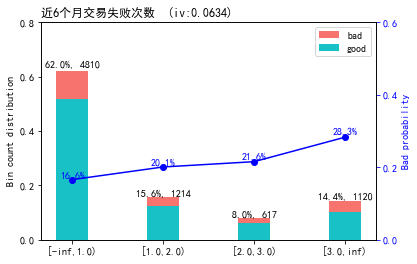

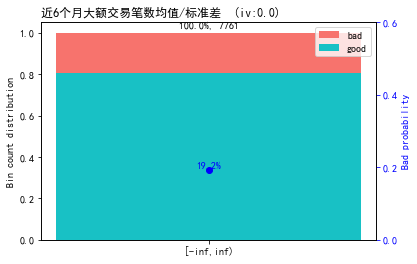

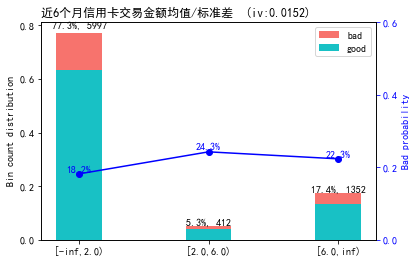

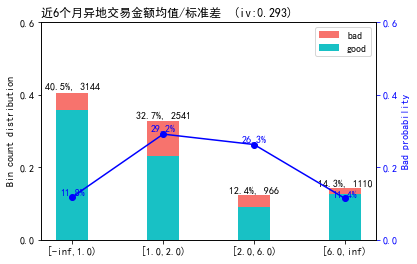

In [540]:
# special_values = {'x_018':[1]}
# bins = sc.woebin(dt_s,y="y",x=["x_018"],special_values=special_values)
bins=sc.woebin(ddy,y="是否逾期")
plots=sc.woebin_plot(bins)

In [537]:
#print(bins['x_003'])
#print(pd.cut(dt_s['x_003'],[float('-inf'),0,float('inf')],right=False).sort_values())
#.astype(str).value_counts()

In [541]:
import numpy as np
#np.sort([bins[x].total_iv.unique()[0] for x in bins.keys()])
feature_iv=pd.DataFrame([[k,v.total_iv[0]] for k,v in bins.items()],columns=['feature','iv']).sort_values(by='iv',ascending=False)
# feature_iv['illus']=[dicts.loc[x]['illus1'] for x in feature_iv['feature']]
feature_iv

,feature,iv
58,近6个月金融类消费金额均值/标准差,0.581775
69,近6个月互联网交易金额均值/标准差,0.391895
62,90天内单笔还款金额最大值,0.316757
8,30天内单笔放款金额最小值,0.298940
0,90天内单笔还款金额最小值,0.295358
79,近6个月异地交易金额均值/标准差,0.293018
36,30天内单笔还款金额最大值,0.289187
25,最近一笔放款金额,0.288323
53,30天内成功还款金额,0.285252
47,30天内单笔还款金额最小值,0.278263


In [543]:
model_features=feature_iv[feature_iv.iv > 0.02].feature.to_list() 
ddy_after_vif=ddy[model_features+['是否逾期']]
bins=sc.woebin(ddy_after_vif,y='是否逾期')

[INFO] creating woe binning ...
Binning on 7761 rows and 29 columns in 00:00:34


In [544]:
binsx={}
for x in model_features:
    binsx[x]=bins[x]

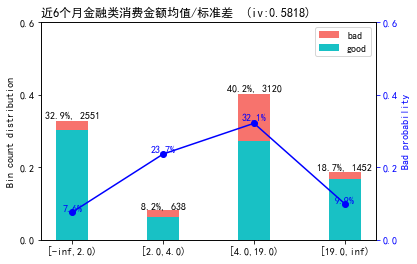

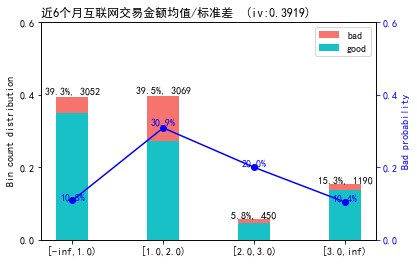

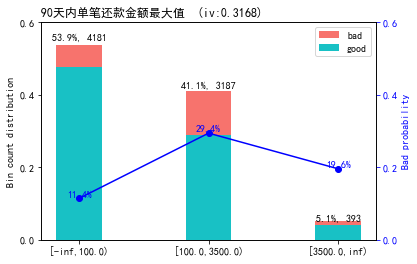

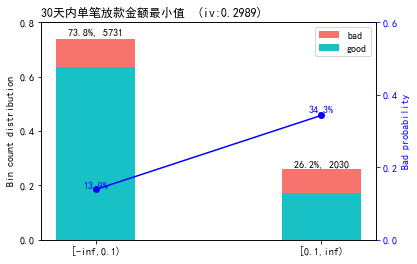

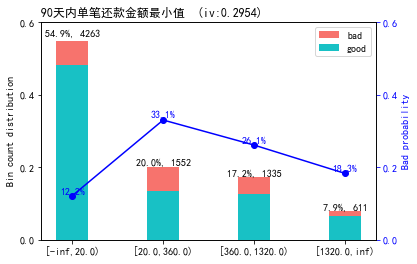

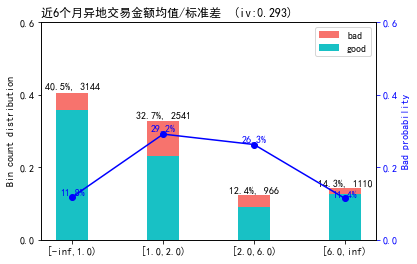

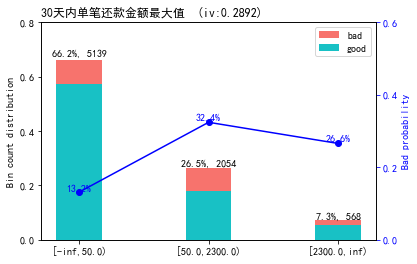

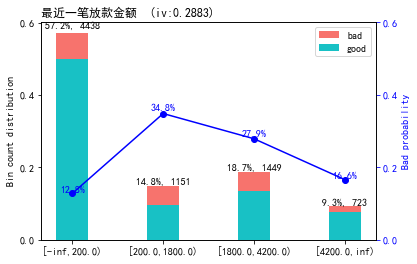

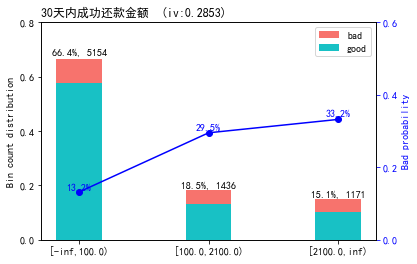

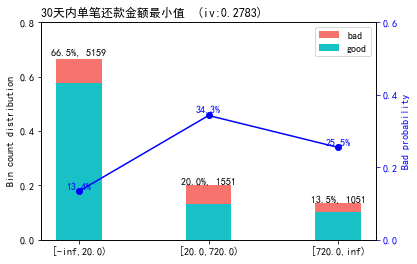

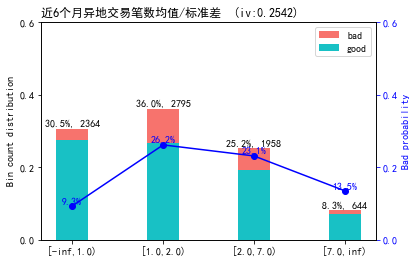

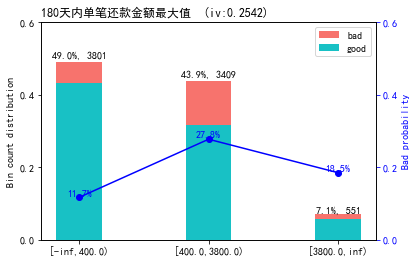

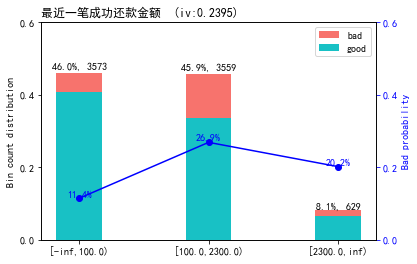

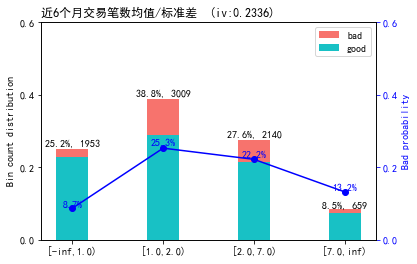

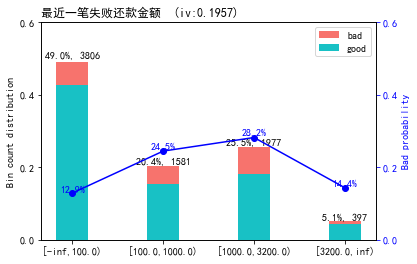

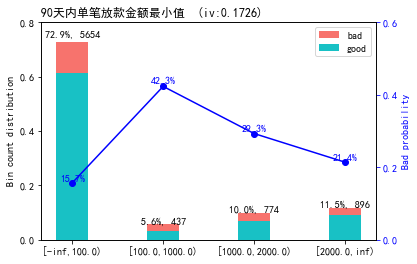

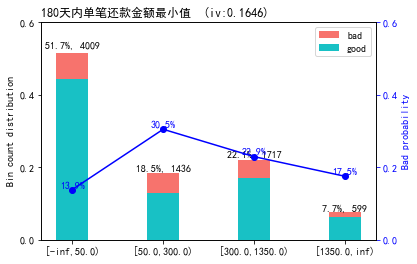

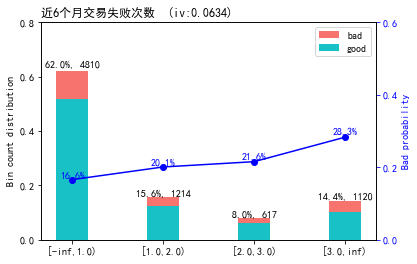

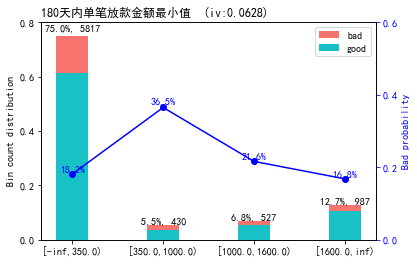

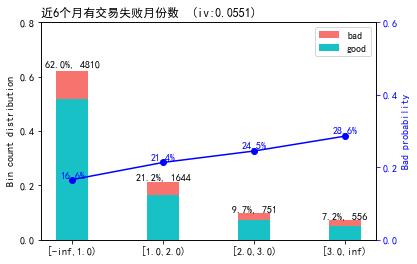

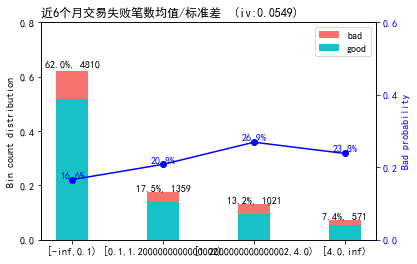

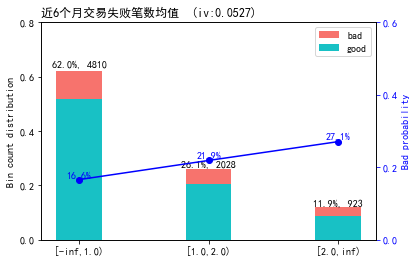

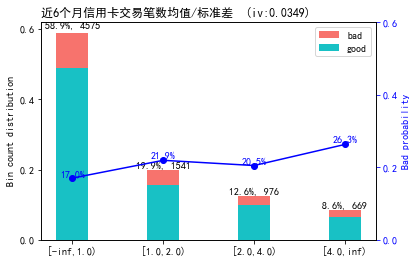

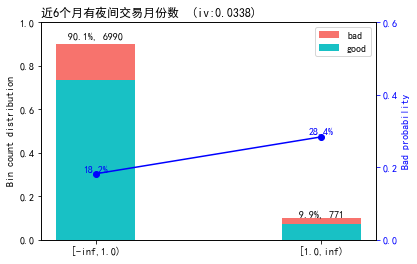

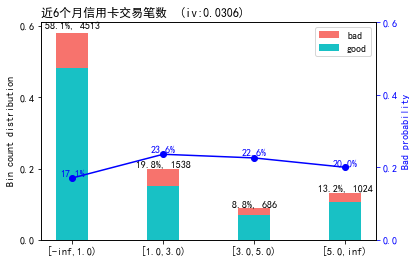

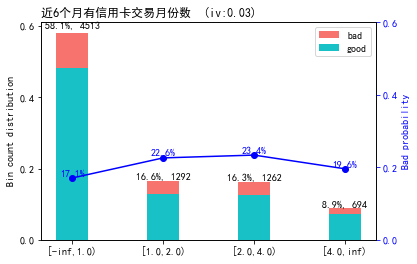

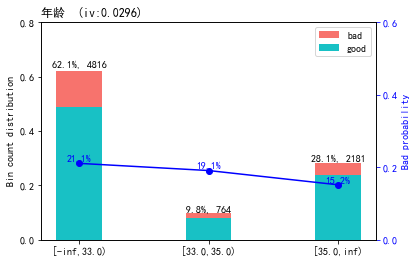

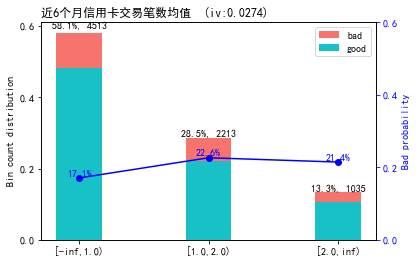

In [545]:
plots=sc.woebin_plot(binsx)

In [615]:
ddz=ddy[['近6个月信用卡交易笔数均值','年龄','最近一笔失败还款金额','是否逾期']]

In [616]:
binsc=sc.woebin(ddz, "是否逾期")

[INFO] creating woe binning ...


-------- 1/2 最近一笔失败还款金额 --------
>>> dt[最近一笔失败还款金额].describe(): 
count     7761.000000
mean       937.885666
std       2110.356382
min          0.000000
25%          0.000000
50%        144.560000
75%       1244.130000
max      44550.000000
Name: 最近一笔失败还款金额, dtype: float64 



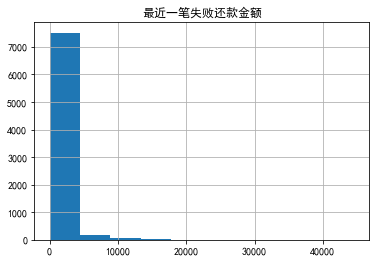

>>> Current breaks:
100.0,1000.0,3200.0 



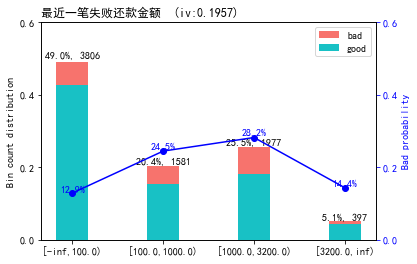

>>> Adjust breaks for (1/2) 最近一笔失败还款金额?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 100,1000
[INFO] creating woe binning ...
>>> Current breaks:
100.0, 1000.0 



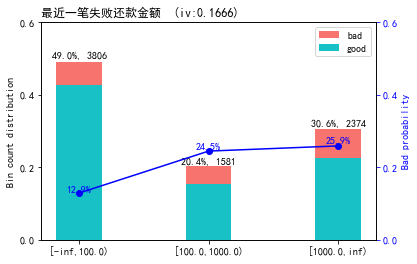

>>> Adjust breaks for (1/2) 最近一笔失败还款金额?
1: next 
2: yes 
3: back
Selection: 1
-------- 2/2 近6个月信用卡交易笔数均值 --------
>>> dt[近6个月信用卡交易笔数均值].describe(): 
count    7761.000000
mean        0.729904
std         1.302501
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        38.500000
Name: 近6个月信用卡交易笔数均值, dtype: float64 



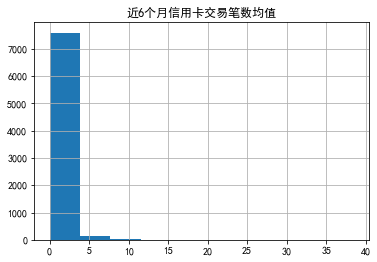

>>> Current breaks:
1.0,2.0 



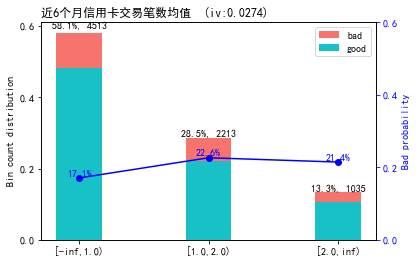

>>> Adjust breaks for (2/2) 近6个月信用卡交易笔数均值?
1: next 
2: yes 
3: back
Selection: 1


In [617]:
adj=sc.woebin_adj(ddz, "是否逾期", binsc)

In [618]:
adj

"{'年龄': [33.0,35.0], '最近一笔失败还款金额': [100,1000], '近6个月信用卡交易笔数均值': [1.0,2.0]}"

In [624]:
bin_adj=sc.woebin(ddz,'是否逾期',breaks_list=adj)

[INFO] creating woe binning ...


{'年龄': <Figure size 432x288 with 2 Axes>,
 '近6个月信用卡交易笔数均值': <Figure size 432x288 with 2 Axes>,
 '最近一笔失败还款金额': <Figure size 432x288 with 2 Axes>}

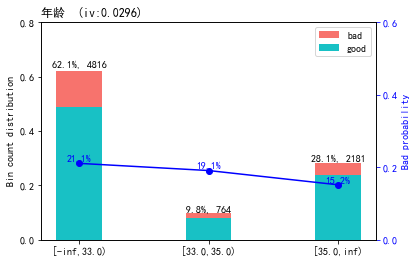

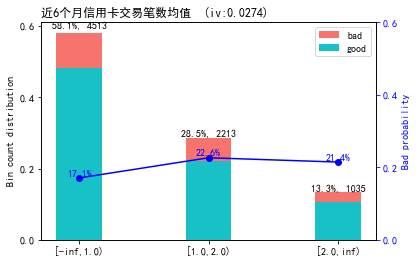

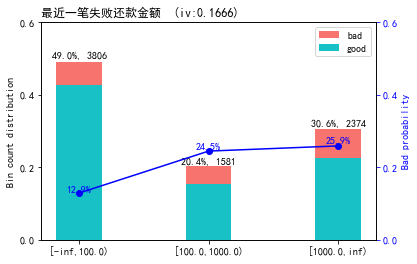

In [625]:
sc.woebin_plot(bin_adj)

In [546]:
train, test = sc.split_df(ddy_after_vif, '是否逾期').values()

In [ ]:
# binning adjustment
# # adjust breaks interactively
# breaks_adj = sc.woebin_adj(dt_s, "creditability", bins) 
# # or specify breaks manually
# breaks_adj = {
#     'x_003': [26, 35],
#     'other.debtors.or.guarantors': ["none", "co-applicant%,%guarantor"]
# }
# bins_adj = sc.woebin(dt_s, y="y", x="x_003", breaks_list={"x_003":[0.5]})
# sc.woebin_plot(bins_adj)
# bins=sc.woebin(dt_s, y="y", x="x_003")
# sc.woebin_plot(bins_adj)

In [547]:
# converting train and test into woe values
train_woe = sc.woebin_ply(train, binsx)
test_woe = sc.woebin_ply(test, binsx)

y_train = train_woe.loc[:,'是否逾期']
X_train = train_woe.loc[:,train_woe.columns != '是否逾期']
y_test = test_woe.loc[:,'是否逾期']
X_test = test_woe.loc[:,train_woe.columns != '是否逾期']

[INFO] converting into woe values ...
[INFO] converting into woe values ...


In [548]:
# logistic regression ------
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(X_train, y_train)
# lr.coef_
# lr.intercept_

# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

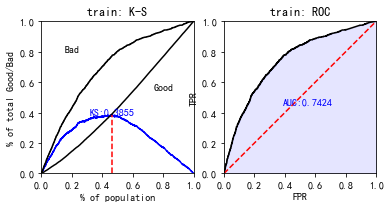

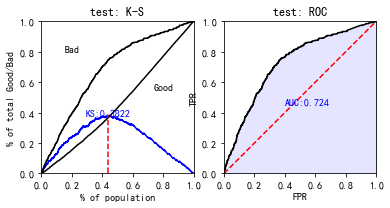

In [549]:
# performance ks & roc ------
train_perf = sc.perf_eva(y_train, train_pred, title = "train")
test_perf = sc.perf_eva(y_test, test_pred, title = "test")

In [550]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
X = X_train
y = y_train
X2 = sm.add_constant(X)
# est = sm.OLS(y, X2)
# est2 = est.fit()
# print(est2.summary())
sml=sm.Logit(y,X2)
sml1=sml.fit(disp=0)
# print(sml1.summary())

In [551]:
sml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   是否逾期   No. Observations:                 5433
Model:                          Logit   Df Residuals:                     5404
Method:                           MLE   Df Model:                           28
Date:                Mon, 04 May 2020   Pseudo R-squ.:                  0.1216
Time:                        23:18:50   Log-Likelihood:                -2336.7
converged:                       True   LL-Null:                       -2660.0
Covariance Type:            nonrobust   LLR p-value:                2.606e-118
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.4480      0.038    -37.762      0.000      -1.523      -1.373
90天内单笔还款金额最小值_woe         0.1295      0.165      0.786      0.432      -0.193       0.452
90天内单笔放款金额最小值_woe         0.0095      0.114      0.084      0.933      -0.213       0.232
180天内单笔放款金额最小值_woe        0.1309      0.159      0.821      0.412      -0.182       0.443
年龄_woe                    0.6924      0.219      3.155      0.002       0.262       1.123
近6个月有信用卡交易月份数_woe         0.6453      0.745      0.867      0.386      -0.814       2.105
最近一笔成功还款金额_woe           -0.1943      0.175     -1.112      0.266      -0.537       0.148
30天内单笔还款金额最小值_woe         0.1404      0.235      0.598      0.550      -0.320       0.600
30天内单笔放款金额最小值_woe         0.2841      0.077      3.699      0.000       0.134       0.435
近6个月异地交易笔数均值/标准差_woe      0.0822      0.144      0.570      0.569      -0.201       0.365
30天内成功还款金额_woe           -0.3238      0.278     -1.166      0.244      -0.868       0.221
近6个月交易笔数均值/标准差_woe        0.1659      0.146      1.133      0.257      -0.121       0.453
近6个月交易失败笔数均值_woe          0.1809      0.409      0.442      0.658      -0.621       0.982
近6个月金融类消费金额均值/标准差_woe     0.5819      0.084      6.927      0.000       0.417       0.747
最近一笔失败还款金额_woe            0.3320      0.100      3.332      0.001       0.137       0.527
90天内单笔还款金额最大值_woe         0.2785      0.173      1.614      0.107      -0.060       0.617
近6个月有夜间交易月份数_woe          0.1910      0.198      0.964      0.335      -0.197       0.579
近6个月信用卡交易笔数_woe           0.0691      0.779      0.089      0.929      -1.457       1.595
近6个月信用卡交易笔数均值/标准差_woe     0.6129      0.443      1.382      0.167      -0.256       1.482
近6个月互联网交易金额均值/标准差_woe     0.2399      0.095      2.525      0.012       0.054       0.426
近6个月交易失败笔数均值/标准差_woe      0.1829      0.492      0.372      0.710      -0.781       1.147
近6个月信用卡交易笔数均值_woe        -1.4858      0.845     -1.759      0.079      -3.142       0.170
最近一笔放款金额_woe              0.2529      0.092      2.758      0.006       0.073       0.433
近6个月有交易失败月份数_woe         -0.8428      0.464     -1.817      0.069      -1.752       0.066
180天内单笔还款金额最小值_woe       -0.0573      0.139     -0.411      0.681      -0.330       0.216
180天内单笔还款金额最大值_woe       -0.1253      0.147     -0.854      0.393      -0.413       0.162
近6个月交易失败次数_woe            0.8486      0.453      1.873      0.061      -0.039       1.737
30天内单笔还款金额最大值_woe         0.2847      0.306      0.929      0.353      -0.316       0.885
近6个月异地交易金额均值/标准差_woe     -0.1937      0.104     -1.868      0.062      -0.397       0.010
=========================================================================================
"""

In [552]:
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01,
                       threshold_out = 0.05,
                       verbose = True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
 
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
#             model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit(disp=0)
            new_pval[new_column] = model.pvalues[new_column]
        print('new_pval',new_pval)
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
 
        # backward step
        model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included]))).fit(disp=0)
        # use all coefs except intercept
        print(included)
        #pvalues = model.pvalues.iloc[:]
        pvalues=model.pvalues
        #print('pvalues',pvalues)
        worst_pval = pvalues.max() # null if pvalues is empty
        #print('pvalues--------------',pvalues,worst_pval,changed)
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [566]:
result = stepwise_selection(X_train, y_train,
                            threshold_in=0.05,
                            threshold_out = 0.1,)
 
# print('resulting features:')
# print(result)
model_features=result

new_pval 180天内单笔还款金额最大值_woe       7.764783e-46
近6个月金融类消费金额均值/标准差_woe    3.029555e-92
近6个月信用卡交易笔数_woe          3.067990e-07
近6个月互联网交易金额均值/标准差_woe    5.330104e-72
近6个月异地交易金额均值/标准差_woe     3.743581e-53
近6个月异地交易笔数均值/标准差_woe     8.763500e-42
30天内单笔放款金额最小值_woe        1.030066e-57
近6个月有夜间交易月份数_woe         8.399252e-07
180天内单笔还款金额最小值_woe       1.678812e-34
近6个月交易笔数均值/标准差_woe       6.226714e-36
近6个月有信用卡交易月份数_woe        8.810502e-08
30天内单笔还款金额最小值_woe        1.583793e-57
近6个月信用卡交易笔数均值_woe        2.782489e-07
近6个月有交易失败月份数_woe         8.979749e-14
最近一笔放款金额_woe             1.580132e-56
近6个月信用卡交易笔数均值/标准差_woe    1.096874e-08
30天内成功还款金额_woe           6.519026e-55
90天内单笔还款金额最大值_woe        2.151662e-60
年龄_woe                   4.529123e-06
最近一笔成功还款金额_woe           6.838938e-44
最近一笔失败还款金额_woe           9.609911e-41
近6个月交易失败次数_woe           1.316436e-15
90天内单笔还款金额最小值_woe        8.668682e-61
近6个月交易失败笔数均值_woe         3.336445e-14
30天内单笔还款金额最大值_woe        6.173294e-56
90天内单笔放款金额最小值_woe        3.512281e-37
180

new_pval 近6个月信用卡交易笔数_woe          0.905264
180天内单笔还款金额最小值_woe       0.179507
近6个月有信用卡交易月份数_woe        0.919003
近6个月信用卡交易笔数均值_woe        0.674245
90天内单笔还款金额最大值_woe        0.441026
180天内单笔放款金额最小值_woe       0.269568
近6个月交易失败笔数均值/标准差_woe     0.911021
180天内单笔还款金额最大值_woe       0.292021
近6个月异地交易金额均值/标准差_woe     0.144482
近6个月异地交易笔数均值/标准差_woe     0.102352
近6个月有夜间交易月份数_woe         0.453301
近6个月交易笔数均值/标准差_woe       0.054373
30天内单笔还款金额最小值_woe        0.281858
近6个月有交易失败月份数_woe         0.105019
近6个月信用卡交易笔数均值/标准差_woe    0.769403
30天内成功还款金额_woe           0.536565
近6个月交易失败笔数均值_woe         0.675820
90天内单笔放款金额最小值_woe        0.606772
30天内单笔还款金额最大值_woe        0.282941
最近一笔成功还款金额_woe           0.166777
dtype: float64
['近6个月金融类消费金额均值/标准差_woe', '最近一笔放款金额_woe', '90天内单笔还款金额最小值_woe', '30天内单笔放款金额最小值_woe', '年龄_woe', '最近一笔失败还款金额_woe', '近6个月交易失败次数_woe', '近6个月互联网交易金额均值/标准差_woe']


In [563]:
X = X_train[result]
y = y_train
X2 = sm.add_constant(X)
# est = sm.OLS(y, X2)
# est2 = est.fit()
# print(est2.summary())
sml=sm.Logit(y,X2)
sml1=sml.fit()
print(sml1.summary())

Optimization terminated successfully.
         Current function value: 0.432374
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   是否逾期   No. Observations:                 5433
Model:                          Logit   Df Residuals:                     5424
Method:                           MLE   Df Model:                            8
Date:                Mon, 04 May 2020   Pseudo R-squ.:                  0.1169
Time:                        23:23:16   Log-Likelihood:                -2349.1
converged:                       True   LL-Null:                       -2660.0
Covariance Type:            nonrobust   LLR p-value:                4.698e-129
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.4469      0.038    -37.949      0.000      -1.522      -1.

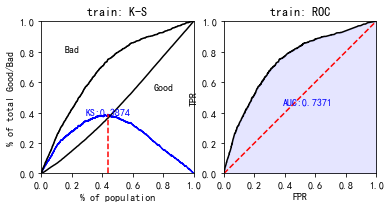

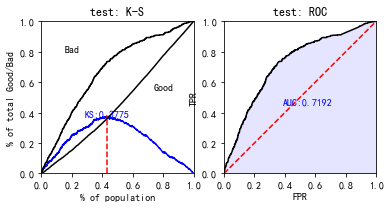

In [555]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(X_train[result], y_train)
# lr.coef_
# lr.intercept_

# predicted proability
train_pred = lr.predict_proba(X_train[result])[:,1]
test_pred = lr.predict_proba(X_test[result])[:,1]
train_perf = sc.perf_eva(y_train, train_pred, title = "train")
test_perf = sc.perf_eva(y_test, test_pred, title = "test")

In [556]:
lr.coef_

array([[0.59376376, 0.26642619, 0.24756395, 0.28243393, 0.67800098,
        0.28485503, 0.39650075, 0.18480249]])

In [565]:
sml1.params

const                   -1.446891
近6个月金融类消费金额均值/标准差_woe    0.591533
最近一笔放款金额_woe             0.268839
90天内单笔还款金额最小值_woe        0.248222
30天内单笔放款金额最小值_woe        0.283506
年龄_woe                   0.729568
最近一笔失败还款金额_woe           0.289603
近6个月交易失败次数_woe           0.417733
近6个月互联网交易金额均值/标准差_woe    0.187618
dtype: float64

In [568]:
model_features

['近6个月金融类消费金额均值/标准差_woe',
 '最近一笔放款金额_woe',
 '90天内单笔还款金额最小值_woe',
 '30天内单笔放款金额最小值_woe',
 '年龄_woe',
 '最近一笔失败还款金额_woe',
 '近6个月交易失败次数_woe',
 '近6个月互联网交易金额均值/标准差_woe']

In [575]:
model_features[0].replace('_woe','')

'近6个月金融类消费金额均值/标准差'

In [576]:
pd.DataFrame([(x,
               feature_iv.set_index('feature').iv.loc[x.replace('_woe','')],
               sml1.params.loc[x],
               sml1.pvalues.loc[x]) for x in model_features],
               columns=['vars','iv','cof','P_val'])

,vars,iv,cof,P_val
0,近6个月金融类消费金额均值/标准差_woe,0.581775,0.591533,2.610770e-14
1,最近一笔放款金额_woe,0.288323,0.268839,7.318380e-04
2,90天内单笔还款金额最小值_woe,0.295358,0.248222,2.641029e-03
3,30天内单笔放款金额最小值_woe,0.298940,0.283506,1.038961e-04
4,年龄_woe,0.029604,0.729568,7.816744e-04
5,最近一笔失败还款金额_woe,0.195707,0.289603,2.100740e-03
6,近6个月交易失败次数_woe,0.063441,0.417733,3.431715e-03
7,近6个月互联网交易金额均值/标准差_woe,0.391895,0.187618,2.785656e-02


In [ ]:
# score ------
card = sc.scorecard(bins, lr, X_train.columns)
# credit score
train_score = sc.scorecard_ply(train, card, print_step=0)
test_score = sc.scorecard_ply(test, card, print_step=0)

In [ ]:
# psi
sc.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)